# Pattern recognition using SLNNs
## Examples and more

Before starting, make sure you have the need libraries installed. If not, use ```pip3 install jupyter numpy scipy pandas```. We can import all functions and classes from ```main```. This notebook needs to be in the same directory as the python file.

In [1]:
from main import *

#### Add noise

We have the vector ```nums``` available to us. We can use ```num_show``` to show any number (or any similar matrix, like the weights).

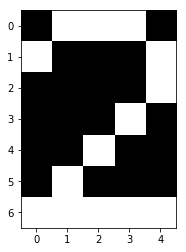

In [13]:
num_show(nums[2])

Adding noise is trivial with the ```add_noise``` function. We just have to specify the percentage of noise to add.

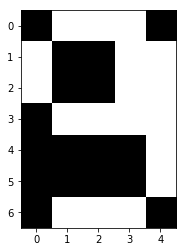

In [9]:
noisy = add_noise(nums[9], 0.05) # 5% of noise.
num_show(noisy)

#### Generate data

The ```gen_data``` function generates at the same time the train and test sets, with their corresponding labels. The arguments are the seed, the number of elements in the train set, the target numbers, the training and the noise percentage.

In [10]:
train, test, ytr, yte = gen_data(123, 10, [1,2,3], 0.5, 0.1)

The labels *ytr* and *yte* are binary numbers, telling us if the corresponding number is one of our targets or not.

array([1.])

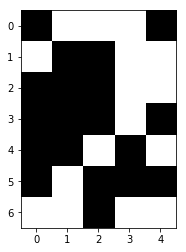

In [8]:
num_show(train[0])
ytr[0]

#### SLNN

There is a class ```SLNN``` available to us. With it, we can train a SLNN model, predict values with it, compute the accuracy...

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	BFGS
Regularization parameter:	0
Loss:				118.1059984055998
Training accuracy:		84.4%
Test accuracy:			71.06%
---------------------------------------------------------------------------
Gradient: 
 [ 3.12891277 -3.07875417  0.84002179 -0.35153353  4.5235095  -3.99597384
  4.55255153  1.08611423  1.94618165 -4.18529443 -4.45280124  1.96185587
  3.37583987  2.92482099 -3.5243842   4.01555449 -7.62581428 -5.1188836
 -4.01328387  3.78584589 -5.90360004  1.3071816   5.74227661  1.48927643
 -2.94814783 -4.90626761  3.32844683  1.1610722   1.31443397 -4.03717514
  3.22949143 -1.65660754 -1.2125115  -0.12144392  1.96565559]
---------------------------------------------------------------------------


/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


,alpha,f(x),||g(x)||,r,M
0,NaN,125.000000,22.724790,NaN,NaN
1,1.406584e-02,121.275461,70.954773,3.122351,0.137398
2,1.002200e-09,118.251250,28.289934,0.398704,0.005619
3,4.803834e-16,118.105998,20.980889,0.741638,0.026216


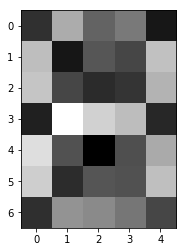

In [11]:
train, test, ytr, yte = gen_data(123456, 500, [8], 0.5, 0.1)
net = SLNN()
net.train("BFGS", train, ytr)
net.summary(test, yte)

There's another method of ```SLNN``` called ```cvtrain```, which will find a regularization parameter for us (using cross-validation) and train the model with it.

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	BFGS
Regularization parameter:	0.3
Loss:				45.64988762129941
Training accuracy:		95.6%
Test accuracy:			90.32%
---------------------------------------------------------------------------
Gradient: 
 [-0.17948467  0.13771914 -0.12362389  0.03798269 -0.05127049  0.13201352
  0.29118305 -0.14038465 -0.15749186  0.26065896 -0.32562301 -0.07579167
 -0.29402269 -0.35554792  0.2716692   0.32671559 -0.0893419   0.4035869
  0.188556    1.04683121 -0.68215907  0.05954559 -0.88975188 -0.04702216
  0.3506315   0.20085228 -0.34674192 -0.20652523 -0.02045568  0.81186022
 -0.39467069  0.11929531  0.45355152  0.13682345 -0.17175046]
---------------------------------------------------------------------------


,alpha,f(x),||g(x)||,r,M
0,NaN,120.650476,21.797951,NaN,NaN
1,4.525402e-01,92.409202,126.689790,5.812005,0.266631
2,2.139093e-09,48.126839,45.508915,0.359215,0.002835
3,7.812548e-16,45.696399,7.200783,0.158228,0.003477
4,4.982071e-22,45.649975,2.231332,0.309874,0.043033
5,2.405773e-28,45.649888,2.182899,0.978294,0.438435


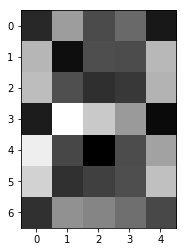

In [7]:
train, test, ytr, yte = gen_data(123456, 500, [8], 0.5, 0.1)
net = SLNN()
net.cvtrain("BFGS", train, ytr)
net.summary(test, yte)

Besides, we can use other optimization algorithms, apart from ```BFGS```, such as ```GM``` and ```CGM```:

/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	CGM
Regularization parameter:	0
Loss:				6.640498856902224e-05
Training accuracy:		100.0%
Test accuracy:			94.38%
---------------------------------------------------------------------------
Gradient: 
 [ 1.57037960e-07 -5.15993848e-07 -2.51979707e-07 -4.09493612e-07
 -8.46613117e-08 -2.99155700e-06  4.78762156e-06  8.59580534e-08
 -9.94293613e-07 -2.93405157e-06 -1.59156194e-06  7.37128710e-07
 -2.61429570e-06 -9.84305279e-07 -3.17626172e-06  2.82194835e-07
 -4.46126255e-07 -7.75183310e-07 -1.68271266e-07  1.42375782e-07
  3.11586100e-06  1.25755726e-07 -1.23222807e-08 -1.97652704e-06
 -5.69778867e-07  8.00403291e-07  6.90101224e-07 -9.58539365e-07
  2.45260755e-06 -1.32194045e-06  9.76953817e-07 -1.1

,alpha,f(x),||g(x)||,r,M
0,NaN,125.000000,23.498640,NaN,NaN
1,0.012545,121.438869,69.109355,2.940994,0.125156
2,0.001506,118.254841,27.115333,0.392354,0.005677
3,0.010094,113.755561,44.911436,1.656311,0.061084
4,0.003360,107.232204,32.831670,0.731031,0.016277
323,1024.000000,0.000069,0.000024,1.664724,116745.823587
324,1024.000000,0.000069,0.000027,1.140533,48046.807394
325,1024.000000,0.000067,0.000013,0.489425,18077.360084
326,1024.000000,0.000067,0.000018,1.342818,101339.794657
327,1024.000000,0.000066,0.000010,0.556389,31269.751249


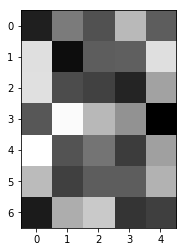

In [17]:
train, test, ytr, yte = gen_data(123456, 500, [8], 0.5, 0.1)
net = SLNN()
net.train("CGM", train, ytr)
gmdata = net.summary(test, yte)
show_less(gmdata)

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	CGM
Regularization parameter:	0
Loss:				12.003458211164963
Training accuracy:		97.6%
Test accuracy:			90.0%
---------------------------------------------------------------------------
Gradient: 
 [-1.43624022e-05 -4.49355857e-05 -6.16486640e-05 -2.96962193e-05
 -2.58739228e-05 -1.30606275e-05 -1.85742374e-05 -1.42124986e-05
 -2.71353979e-05 -3.58329476e-05 -8.32541544e-05 -1.17778726e-05
 -1.96030393e-05  1.86818034e-05  2.55213752e-06 -6.09375824e-06
 -9.09656860e-05 -2.94089210e-05 -6.50026331e-05 -3.16521323e-05
 -3.25482866e-05 -1.84857861e-05 -3.07404727e-06 -2.47235743e-05
 -2.09282173e-05  2.61343958e-05  2.74189689e-05 -2.28695480e-05
 -4.69244674e-05 -4.71128391e-05  1.19051531e-05 -1.291347

,alpha,f(x),||g(x)||,r,M
0,NaN,125.000000,16.509071,NaN,NaN
1,0.016658,122.678007,56.253205,3.407412,0.206396
2,0.001482,120.552235,18.619198,0.330989,0.005884
3,0.013853,117.976908,44.542573,2.392293,0.128485
4,0.008932,106.588931,79.504025,1.784900,0.040072
996,4.000000,12.003462,0.001122,0.468771,195.847834
997,2.000000,12.003459,0.000618,0.550538,490.664470
998,2.000000,12.003459,0.000295,0.476781,771.843378
999,2.000000,12.003458,0.000194,0.658399,2235.529626
1000,4.000000,12.003458,0.000214,1.103469,5690.663932


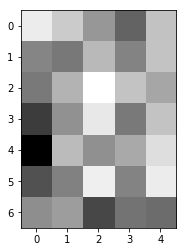

In [19]:
train, test, ytr, yte = gen_data(123456, 500, [1,3,5,7,9], 0.5, 0.1)
net = SLNN()
net.train("CGM", train, ytr)
cgmdata = net.summary(test, yte)
show_less(cgmdata)

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	CGM
Regularization parameter:	0
Loss:				15.00461372148576
Training accuracy:		97.0%
Test accuracy:			89.9%
---------------------------------------------------------------------------
Gradient: 
 [-4.50409846e-05 -2.90856588e-05 -2.80595714e-05 -5.34934269e-05
  3.28454040e-05 -8.04896574e-05 -1.11952456e-05 -5.63522955e-06
 -3.03351199e-05  2.01477510e-06 -8.05472042e-05 -2.94303814e-05
 -2.12377654e-05 -7.99805921e-05  5.79609214e-07 -3.07476667e-05
 -4.19036609e-05 -5.47172754e-05  1.16011887e-06 -3.75551097e-05
 -7.62747365e-05 -6.99823417e-06  4.02261044e-05  1.47174510e-05
 -8.96052066e-05 -1.11554571e-04  1.93227736e-05 -2.88090956e-05
 -5.88618055e-06 -7.99151481e-05  3.24903712e-05 -5.1883561

,alpha,f(x),||g(x)||,r,M
0,NaN,125.000000,16.890307,NaN,NaN
1,0.020617,121.975666,63.957107,3.786616,0.224189
2,0.001493,119.289292,20.286247,0.317185,0.004959
3,0.009508,117.601397,42.510477,2.095532,0.103298
4,0.015148,103.131338,96.268760,2.264589,0.053271
996,2.000000,15.004618,0.001674,0.560105,187.452625
997,2.000000,15.004614,0.000533,0.318613,190.377341
998,2.000000,15.004614,0.000261,0.488899,916.871704
999,2.000000,15.004614,0.000215,0.825973,3168.372174
1000,4.000000,15.004614,0.000296,1.373518,6378.805046


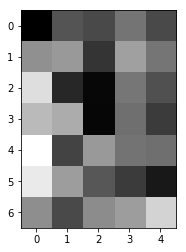

In [18]:
train, test, ytr, yte = gen_data(123456, 500, [0,2,4,6,8], 0.5, 0.1)
net = SLNN()
net.train("CGM", train, ytr)
cgmdata = net.summary(test, yte)
show_less(cgmdata)

And we can plot the gradient norm and the rates...

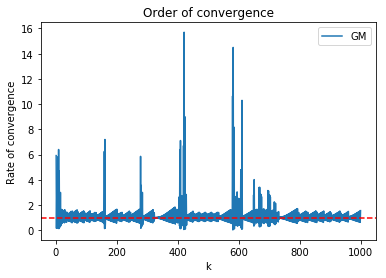

In [10]:
plt.figure()
plt.ylabel('Rate of convergence')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(gmdata['r'], label = "GM")
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.legend()
plt.show()

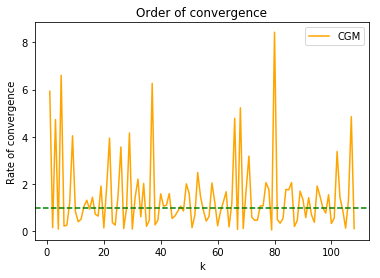

In [13]:
plt.figure()
plt.ylabel('Rate of convergence')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(cgmdata['r'], label = "CGM", color = "orange")
plt.axhline(y = 1, color = 'green', linestyle = '--')
plt.legend()
plt.show()

And compare:

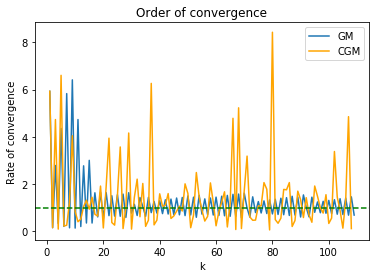

In [15]:
plt.figure()
plt.ylabel('Rate of convergence')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(gmdata['r'][1:110], label = "GM")
plt.plot(cgmdata['r'], label = "CGM", color = "orange")
plt.axhline(y = 1, color = 'green', linestyle = '--')
plt.legend()
plt.show()

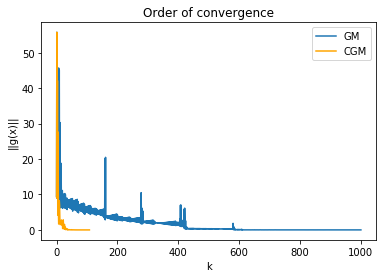

In [16]:
plt.figure()
plt.ylabel('||g(x)||')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(gmdata['||g(x)||'], label = "GM")
plt.plot(cgmdata['||g(x)||'], label = "CGM", color = 'orange')
plt.legend()
plt.show()